<a href="https://colab.research.google.com/github/Ebin2005/codtech_internship_task_4/blob/main/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                tweet  polarity sentiment
0                I love this product!     0.625  Positive
1  This is the worst experience ever.    -1.000  Negative
2      Not bad, but not great either.    -0.025  Negative
3               Absolutely fantastic!     0.500  Positive
4                  I hate it so much.    -0.300  Negative
5         It's okay, could be better.     0.500  Positive


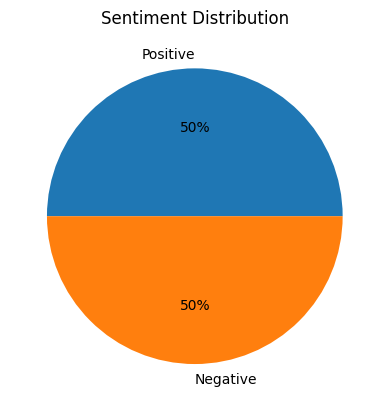

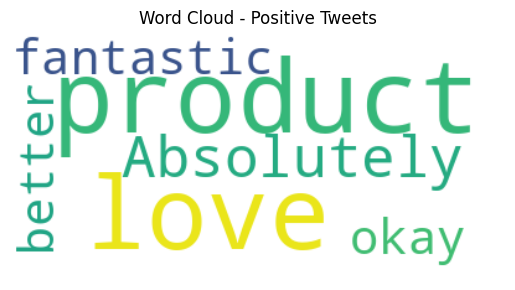

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud


data = {
    "tweet": [
        "I love this product!",
        "This is the worst experience ever.",
        "Not bad, but not great either.",
        "Absolutely fantastic!",
        "I hate it so much.",
        "It's okay, could be better."
    ]
}

df = pd.DataFrame(data)


def get_sentiment(text):
    return TextBlob(text).sentiment.polarity


df["polarity"] = df["tweet"].apply(get_sentiment)


def label_sentiment(p):
    if p > 0:
        return "Positive"
    elif p < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["polarity"].apply(label_sentiment)


print(df)


df["sentiment"].value_counts().plot.pie(autopct='%1.0f%%', title="Sentiment Distribution")
plt.ylabel("")
plt.show()


positive_texts = " ".join(df[df["sentiment"] == "Positive"]["tweet"])
wordcloud = WordCloud(background_color="white").generate(positive_texts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Tweets")
plt.show()
